# <center>Practice 01. Введение</center>
## <center>2. Библиотека Pandas</center>

**Pandas** --- библиотека для удобной загрузки, обработки и анализа данных в виде таблиц. Запросы схожи с SQL. Основные структуры данных в Pandas --- классы Series и DataFrame.

Series --- одномерный массив с индексами, элементы которого одного типа. Часто можно работать к с ndarray.

DataFrame --- таблица, каждый столбец которой содержит элементы одного типа. Или словарь объектов типа Series. Строки --- объекты, а столбцы --- признаки (фичи) этих объектов.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

## pd.Series

Создадим объект pd.Series

In [2]:
bdays = pd.Series([1995, 1994, 2000, 2002], index=["Ivanov", "Petrov", "Ivanova", "Petrova"])
bdays

Ivanov     1995
Petrov     1994
Ivanova    2000
Petrova    2002
dtype: int64

In [3]:
bdays[bdays == 1995]  # доступ к элементам по условию

Ivanov    1995
dtype: int64

In [4]:
bdays[bdays < 2000]

Ivanov    1995
Petrov    1994
dtype: int64

In [5]:
bdays["Ivanov"]  # доступ по конкретному индексу

1995

In [6]:
bdays.Ivanov  # если название индекса без пробелов

1995

In [7]:
bdays["Ivanov"] = np.nan  # пропущенное значение
bdays

Ivanov        NaN
Petrov     1994.0
Ivanova    2000.0
Petrova    2002.0
dtype: float64

In [8]:
bdays.fillna(-1, inplace=True)  # заменяем пропущенные значения, inplace для изменения объекта, а не создании копии
bdays

Ivanov       -1.0
Petrov     1994.0
Ivanova    2000.0
Petrova    2002.0
dtype: float64

In [9]:
np.abs(bdays)  # можно работать с pd.Series как и с ndarray

Ivanov        1.0
Petrov     1994.0
Ivanova    2000.0
Petrova    2002.0
dtype: float64

In [10]:
bdays**2

Ivanov           1.0
Petrov     3976036.0
Ivanova    4000000.0
Petrova    4008004.0
dtype: float64

In [11]:
bdays + bdays

Ivanov       -2.0
Petrov     3988.0
Ivanova    4000.0
Petrova    4004.0
dtype: float64

In [12]:
bdays[3:1:-1]

Petrova    2002.0
Ivanova    2000.0
dtype: float64

In [13]:
bdays.shape

(4,)

In [14]:
bdays.size

4

## pd.DataFrame

Создадим объект pd.DataFrame

In [15]:
df = pd.DataFrame(
    np.random.randn(4, 3),
    index=["Объект1", "Объект2", "Объект3", "Объект4"],
    columns=["Признак1", "Признак2", "Признак3"],
)
df

,Признак1,Признак2,Признак3
Объект1,-0.712354,1.139321,0.097207
Объект2,0.946783,-1.047988,-1.739237
Объект3,0.773297,-1.090296,-0.367286
Объект4,-0.359566,0.020303,-0.896396


Или создадим с помощью словаря

In [16]:
df = pd.DataFrame(
    {"Признак1": np.random.randn(4), "Признак2": ["male", "male", "female", "female"], "Признак3": np.arange(1, 5)}
)
df

,Признак1,Признак2,Признак3
0,0.580199,male,1
1,0.925264,male,2
2,-0.415644,female,3
3,-2.123410,female,4


In [17]:
df.at[1, "Признак1"]  # конкретная ячейка

0.9252635042012346

In [18]:
df.iloc[1, 0]  # ячейка по индексам

0.9252635042012346

In [19]:
df.loc[[0, 1], ["Признак1", "Признак2"]]  # часть датафрейма по названиям индексов

,Признак1,Признак2
0,0.580199,male
1,0.925264,male


In [20]:
df.iloc[[0, 1], [0, 1]]  # часть датафрейма по индексам

,Признак1,Признак2
0,0.580199,male
1,0.925264,male


In [21]:
df.iloc[0]  # передаём индекс конкретной строки

Признак1    0.580199
Признак2        male
Признак3           1
Name: 0, dtype: object

In [22]:
df.iloc[[0, 1]]  # список индексов строк

,Признак1,Признак2,Признак3
0,0.580199,male,1
1,0.925264,male,2


In [23]:
df.iloc[[True, False, True, False]]  # маску для индексов строк

,Признак1,Признак2,Признак3
0,0.580199,male,1
2,-0.415644,female,3


In [24]:
df.iloc[lambda x: x.index % 2 == 0]  # маску лямбда функцией

,Признак1,Признак2,Признак3
0,0.580199,male,1
2,-0.415644,female,3


In [25]:
df.iloc[1:3, 0:3]  # используем срезы для индексов строк и столбцов

,Признак1,Признак2,Признак3
1,0.925264,male,2
2,-0.415644,female,3


In [26]:
df.iloc[0, 0] = 0  # присваивание
df

,Признак1,Признак2,Признак3
0,0.000000,male,1
1,0.925264,male,2
2,-0.415644,female,3
3,-2.123410,female,4


In [27]:
df['Признак4'] = [4, 3, 2, 1]  # присваивание всему столбцу (создание нового столбца)
df

,Признак1,Признак2,Признак3,Признак4
0,0.000000,male,1,4
1,0.925264,male,2,3
2,-0.415644,female,3,2
3,-2.123410,female,4,1


In [28]:
df.iloc[3, 3] = np.nan  # пропущенное значение
df

,Признак1,Признак2,Признак3,Признак4
0,0.000000,male,1,4.0
1,0.925264,male,2,3.0
2,-0.415644,female,3,2.0
3,-2.123410,female,4,NaN


In [29]:
pd.isnull(df)  # маска пропущенных значений

,Признак1,Признак2,Признак3,Признак4
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,True


In [30]:
df.describe()  # информация по количественным признакам

,Признак1,Признак3,Признак4
count,4.000000,4.000000,3.0
mean,-0.403448,2.500000,3.0
std,1.276279,1.290994,1.0
min,-2.123410,1.000000,2.0
25%,-0.842585,1.750000,2.5
50%,-0.207822,2.500000,3.0
75%,0.231316,3.250000,3.5
max,0.925264,4.000000,4.0


In [31]:
df.info()  # другая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Признак1  4 non-null      float64
 1   Признак2  4 non-null      object 
 2   Признак3  4 non-null      int64  
 3   Признак4  3 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 256.0+ bytes


In [32]:
df.fillna(0)  # заполнение пропущенных значений

,Признак1,Признак2,Признак3,Признак4
0,0.000000,male,1,4.0
1,0.925264,male,2,3.0
2,-0.415644,female,3,2.0
3,-2.123410,female,4,0.0


## Чтение данных

Скачать датасет Титаника можно и посмотреть его описание можно [тут](https://www.kaggle.com/competitions/titanic/data).

In [33]:
df = pd.read_csv("../../data/titanic/titanic_train.csv", index_col="PassengerId")
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [34]:
df.shape  # размер таблицы

(891, 11)

In [35]:
df.columns.values  # массив признаков в датасете

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [36]:
df.head()  # первые несколько строк датасета

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
df.head(3)  # первые три строки

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [38]:
df.tail()  # последние строки

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [39]:
df.info()  # смотрим тип признаков и какие из стобцов содержат пропущенные значения

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [40]:
df.describe()  # статистики по количественным признакам

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
df.sort_values(by="Age", ascending=False).head()  # сортировка по признаку

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [42]:
df.sort_values(by=["Sex", "Age"], ascending=[True, False]).head() # сортировка по нескольким признакам

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [43]:
df["Age"].mean()  # статистики признаков

29.69911764705882

In [44]:
df["Survived"].mean()  # доля выживших

0.3838383838383838

In [45]:
df[df["Sex"] == "female"].head()  # фильтрация маской

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [46]:
len(df[(df["Sex"] == "female") & (df["Survived"] == 1)])  # сколько выжило женщин?

233

In [47]:
len(df[(df["Sex"] == "male") & (df["Survived"] == 1)])  # сколько выжило мужчин?

109

In [48]:
# разница среднего возраста мужчин и женщин
df[(df["Sex"] == "male")]["Age"].mean() - df[(df["Sex"] == "female")]["Age"].mean()

2.8109357793509417

In [49]:
df[['Age', 'Survived']].apply(np.mean)  # применение аггрегации к столбцам

Age         29.699118
Survived     0.383838
dtype: float64

In [50]:
df["Is_adult"] = df["Age"].apply(lambda x: 0 if x < 18 else 1)  # применение функции к ячейкам столбца
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_adult
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1


In [51]:
df2 = df.groupby('Sex').agg('mean')  # группировка по столбцу и аггрегация количественных признаков
df2

,Survived,Pclass,Age,SibSp,Parch,Fare,Is_adult
Sex,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.824841
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.899480


In [52]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_adult
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1


Теперь сгруппируем по нескольким столбцам, укажем какие столбцы и какими функциями хотим аггрегировать с помощью словаря, а также переименуем эти столбцы.

In [53]:
df3 = df.groupby(['Sex', 'Pclass']).aggregate({'Age':'mean', 'SibSp':'mean'})\
    .rename(columns={'Age':'mean_Age', 'SibSp':'mean_SibSp'})
df3

mean_Age  mean_SibSp
Sex    Pclass                       
female 1       34.611765    0.553191
       2       28.722973    0.486842
       3       21.750000    0.895833
male   1       41.281386    0.311475
       2       30.740707    0.342593
       3       26.507589    0.498559

И немного pandas визуализации.

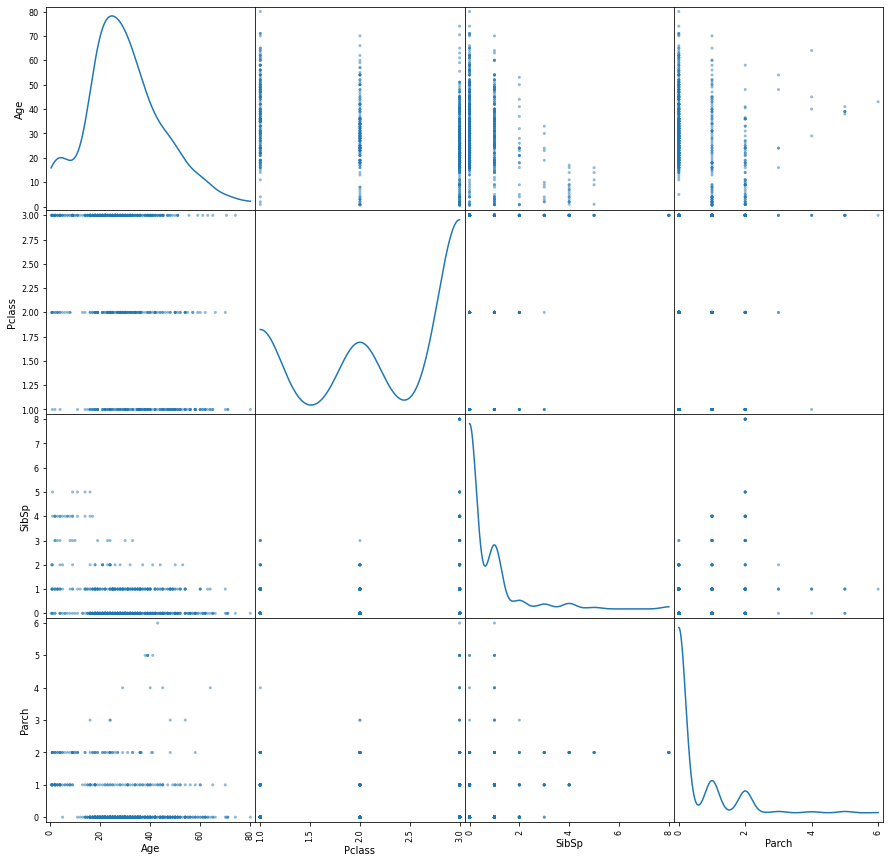

In [54]:
pd.plotting.scatter_matrix(
    df[["Age", "Pclass", "SibSp", "Parch"]], figsize=(15, 15), diagonal="kde"
)
plt.show()

<AxesSubplot:>

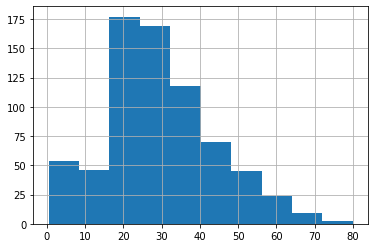

In [55]:
df["Age"].hist()

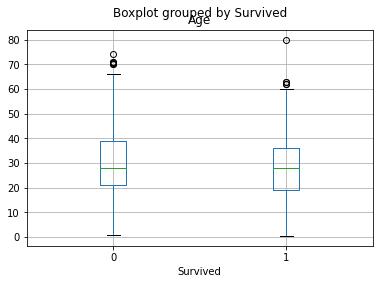

In [56]:
df.boxplot(column="Age", by="Survived")
plt.show()

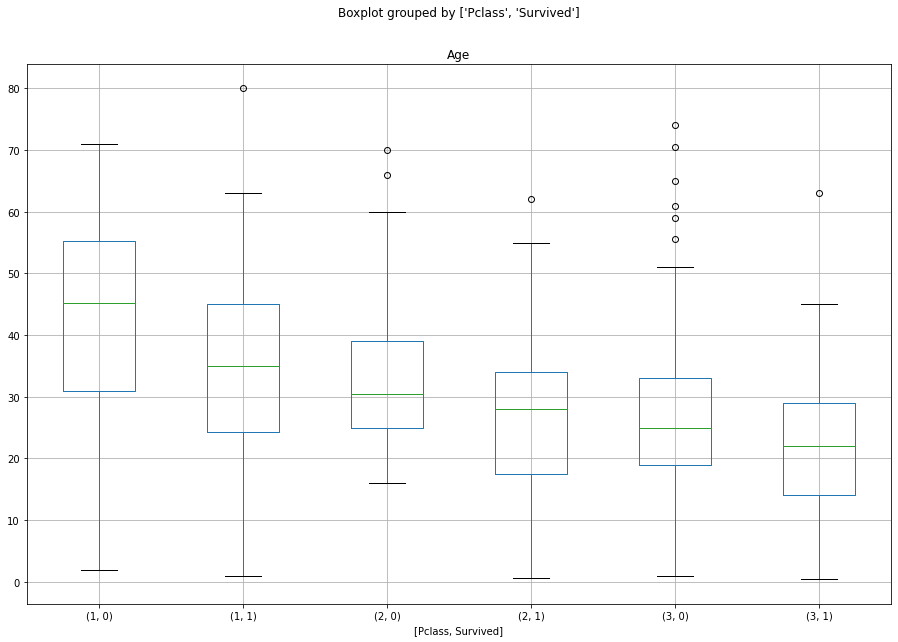

In [57]:
df.boxplot(column="Age", by=["Pclass", "Survived"], figsize=(15, 10))
plt.show()